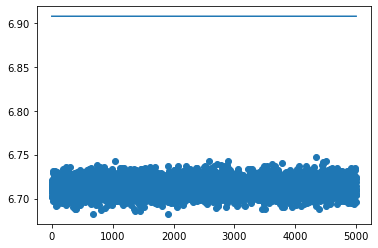

In [3]:
# Here is a very inefficient way to generate a plot of information for a fixed number of runs given a one-particle, n-state system.
# Arguably might be better to generate the random probabilities using a Gaussian distribution and then throwing out the bad values that will give a "nan" return.
# This is not efficient though, so try and limit the number of runs/states.
# Can probably add functionality to generate randoms based on desired distribution; I won't though. Maybe eventually.

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from random import random # Generate Gaussian floats randomly.

# This will compute the information given a one-particle system in n-states.

def information(x):
    info = 0
    total = sum(x)
    y = []
    for item in x:
        y.append(item/total) # Computes normalized probability array.
    for item in y:
        info = info + (item)*(np.log(item))
    return -info # Computes information.
    
states = 1000 # Number of states.
runs = 5000 # Number of information distributions to generate.
run_arr = np.arange(1,(runs+1),1).tolist() # Array to hold x-axis values for which run had what information return.
res = [] # List to hold information for plotting.
equi = (1.0/states) # Equiprobable distribution probability.
limit = []
total = 0

for i in range(runs):
    x = []
    for j in range(states):
        x.append(random())
    res.append(information(x))
    
# Computes maximum information probable for a system.

for i in range(states):
  total = total + (equi)*np.log(equi)

total = -total

for i in range(runs):
    limit.append(total)
    
# Plotting...

plt.plot(run_arr, limit)
plt.scatter(run_arr, res)
plt.show()